<a href="https://colab.research.google.com/github/abhijeet5642/Loan-Prediction-Dataset-abhi/blob/master/loanapprovalabhijeet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## install the libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Bank loan datasets - Sheet1.csv')
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.rename(columns={
"LP001002": "ID",
"Male" : "Gender",
"No": "Married",
"0": "Dependent",
"No.1": "Self Employed",
"5849": "Applicant Income",
"0.1": "Co applicant Income",
"Unnamed: 8": "Loan Amount",
"360": "Loan Amount Term",
"1": "Credit History",
"Urban": "Property Area",
"Y": "Loan Status"
}, inplace=True)

In [ ]:
df.columns

Index(['ID', 'Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed',
       'Applicant Income', 'Co applicant Income', 'Loan Amount',
       'Loan Amount Term', 'Credit History', 'Property Area', 'Loan Status'],
      dtype='object')

In [ ]:
df.head(10)

,ID,Gender,Married,Dependent,Graduate,Self Employed,Applicant Income,Co applicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
6,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
7,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
8,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
9,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [ ]:
#checking the dimension of the dataset
df.shape

(613, 13)

here we can see that in datasets there are 613 rows and 13 colums

In [ ]:
print("the dimension of the dataset:",df.shape)
print("the column headers:",df.columns)

the dimension of the dataset: (613, 13)
the column headers: Index(['ID', 'Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed',
       'Applicant Income', 'Co applicant Income', 'Loan Amount',
       'Loan Amount Term', 'Credit History', 'Property Area', 'Loan Status'],
      dtype='object')


In [ ]:
df.describe()

,Applicant Income,Co applicant Income,Loan Amount,Loan Amount Term,Credit History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
#checking the types of column
df.dtypes

,0
LP001002,object
Male,object
No,object
0,object
Graduate,object
No.1,object
5849,int64
0.1,float64
Unnamed: 8,float64
360,float64


In [ ]:
df.isnull().sum()

,0
ID,0
Gender,13
Married,3
Dependent,15
Graduate,0
Self Employed,32
Applicant Income,0
Co applicant Income,0
Loan Amount,21
Loan Amount Term,14


In [ ]:
#count values of each columns
for i in df.columns:
  print(df[i].value_counts())
  print("\n")

ID
LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: count, Length: 613, dtype: int64


Gender
Male      488
Female    112
Name: count, dtype: int64


Married
Yes    398
No     212
Name: count, dtype: int64


Dependent
0     344
1     102
2     101
3+     51
Name: count, dtype: int64


Graduate
Graduate        479
Not Graduate    134
Name: count, dtype: int64


Self Employed
No     499
Yes     82
Name: count, dtype: int64


Applicant Income
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 504, dtype: int64


Co applicant Income
0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


Loan Amount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
       

In [ ]:
#gender column
df["Gender"].fillna("Male",inplace=True)

In [ ]:
#Married columns
df["Married"].fillna("Yes",inplace=True)

In [ ]:
#Dependent columns
df["Dependent"].fillna(0, inplace=True)

In [ ]:
#Self employed column
df["Self Employed"].fillna("No", inplace=True)

In [ ]:
df['Loan Amount']=df['Loan Amount'].fillna(df['Loan Amount'].mean())

In [ ]:
#credit history
df['Credit History'].fillna(1, inplace=True);

In [ ]:
#filling null values in loan amount with its mean
df['Loan Amount Term']=df['Loan Amount Term'].fillna(df['Loan Amount Term'].mean())

In [ ]:
#now again checking null values in this dataset
df.isnull().sum()

,0
ID,0
Gender,0
Married,0
Dependent,0
Graduate,0
Self Employed,0
Applicant Income,0
Co applicant Income,0
Loan Amount,0
Loan Amount Term,0


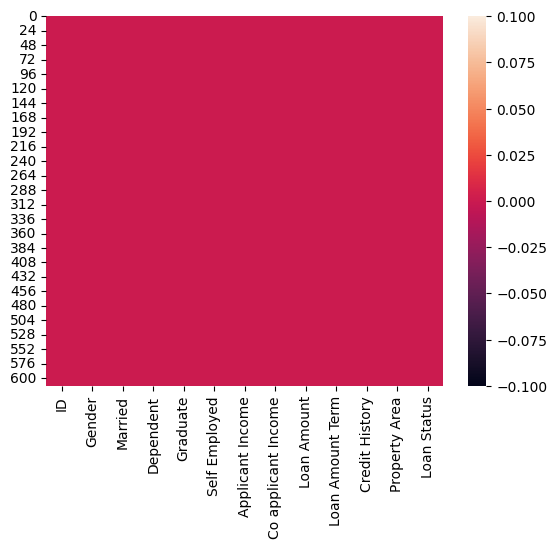

In [ ]:
sns.heatmap(df.isnull());

Exploratory data analysis

In [ ]:
df.drop(["ID"],axis=1, inplace = True)

In [ ]:
#now separating categorical columns and numerical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)


        #print value
        print("categorical columns:",categorical_col)




numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)

         #print value
        print("numerical columns:",numerical_col)


categorical columns: ['Gender']
categorical columns: ['Gender', 'Married']
categorical columns: ['Gender', 'Married', 'Dependent']
categorical columns: ['Gender', 'Married', 'Dependent', 'Graduate']
categorical columns: ['Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed']
categorical columns: ['Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed', 'Property Area']
categorical columns: ['Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed', 'Property Area', 'Loan Status']
numerical columns: ['Applicant Income']
numerical columns: ['Applicant Income', 'Co applicant Income']
numerical columns: ['Applicant Income', 'Co applicant Income', 'Loan Amount']
numerical columns: ['Applicant Income', 'Co applicant Income', 'Loan Amount', 'Loan Amount Term']
numerical columns: ['Applicant Income', 'Co applicant Income', 'Loan Amount', 'Loan Amount Term', 'Credit History']


In [ ]:
#now checking the unique value
df.nunique().to_frame(' NO OF unique  VALUES' )

,NO OF unique VALUES
Gender,2
Married,2
Dependent,5
Graduate,2
Self Employed,2
Applicant Income,504
Co applicant Income,287
Loan Amount,204
Loan Amount Term,11
Credit History,2


now check the unique values


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Dependent'].unique()

array(['1', '0', '2', '3+', 0], dtype=object)

In [ ]:
df['Graduate'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
df['Self Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Property Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [ ]:
df['Loan Status'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df['Credit History'].unique()

array([1., 0.])

Data visualize

Gender
Male      501
Female    112
Name: count, dtype: int64


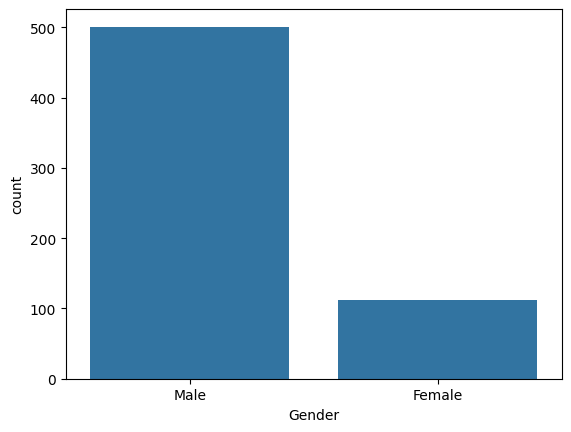

In [ ]:
#visualize the number of gender
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Married
Yes    401
No     212
Name: count, dtype: int64


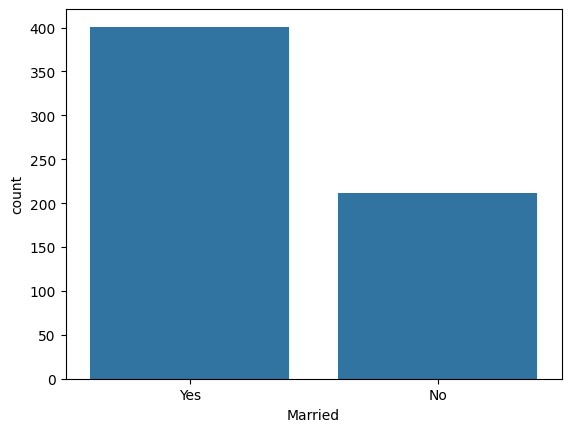

In [ ]:
#visualize the number of married
ax=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

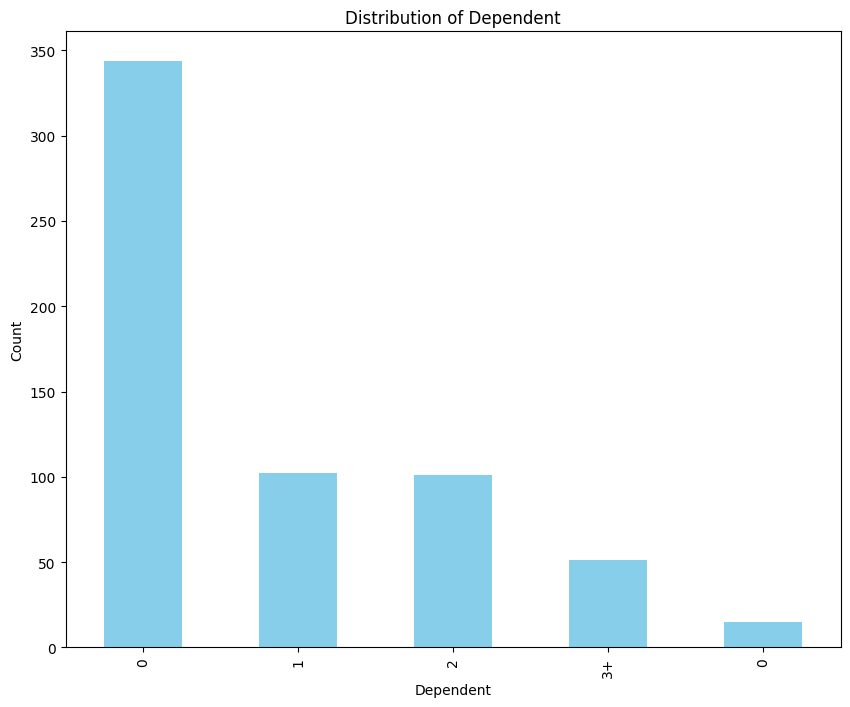

In [ ]:
#assuming df is your DataFrame and it has a column named 'dependent'
job_counts = df["Dependent"].value_counts()
plt.figure(figsize=(10,8))
job_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Dependent")
plt.xlabel("Dependent")
plt.ylabel("Count")
plt.show()

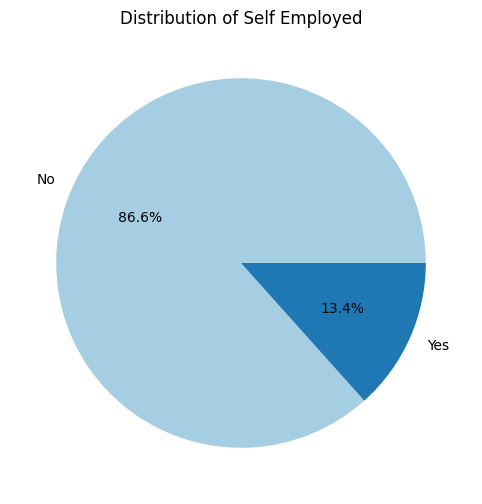

In [ ]:
#Assuming df is your DataFrame and it has a column named 'self employed'
job_counts = df["Self Employed"].value_counts()
plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Self Employed")
plt.ylabel("") #hide the y-label
plt.show()


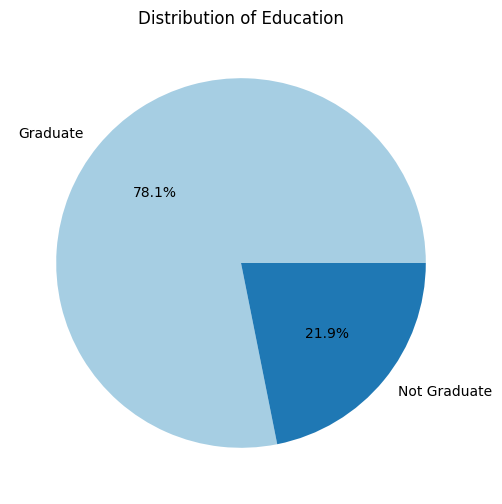

In [ ]:
#Assuming df is your DataFrame and it has a column named 'Education'
job_counts = df["Graduate"].value_counts()
plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Education")
plt.ylabel("") #hide the y-label
plt.show()

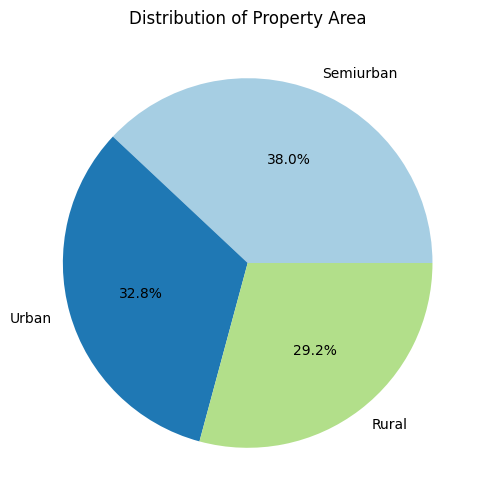

In [ ]:
#Assuming df is your DataFrame and it has a column named 'property area
job_counts = df["Property Area"].value_counts()
plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Property Area")
plt.ylabel("")
plt.show()

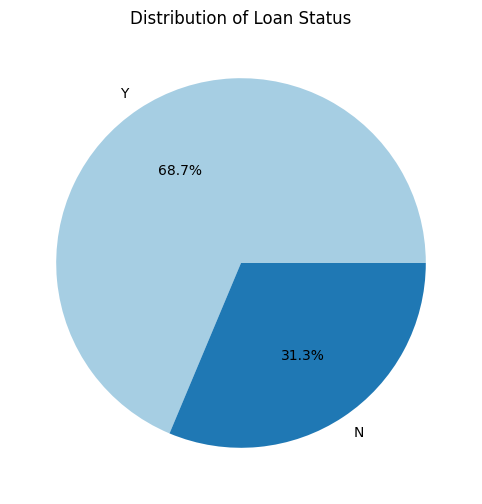

In [ ]:
#Assuming df is your DataFrame and it has a column named 'Loan status'
job_counts = df["Loan Status"].value_counts()
plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Loan Status")
plt.ylabel("")
plt.show()

# Relational Analysis

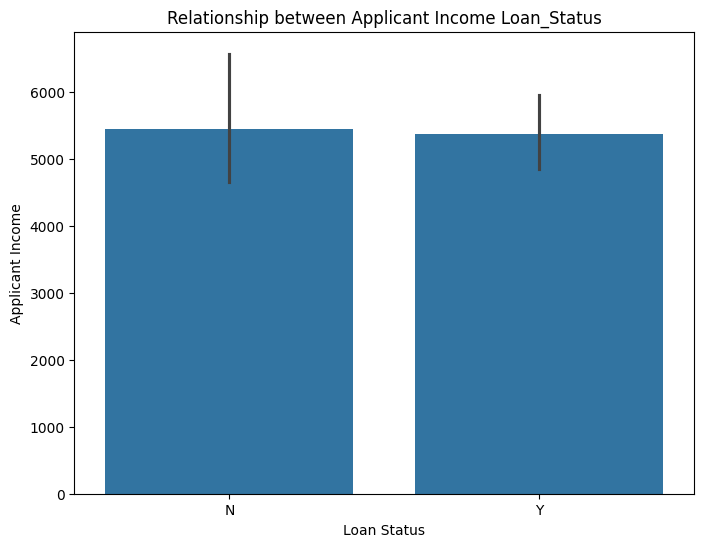

In [ ]:
import seaborn as sns
# import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.barplot(x='Loan Status', y='Applicant Income', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.title('Relationship between Applicant Income Loan_Status')
plt.show()


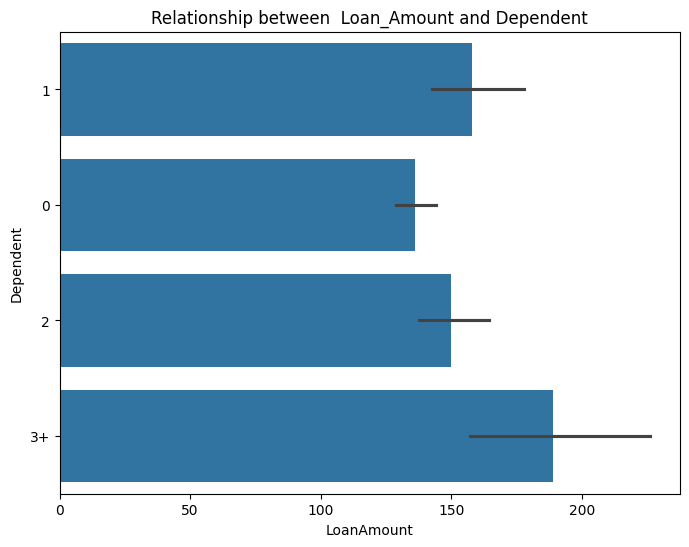

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Loan Amount', y='Dependent', data=df)
plt.xlabel('LoanAmount')
plt.ylabel('Dependent')
plt.title('Relationship between  Loan_Amount and Dependent')
plt.show()

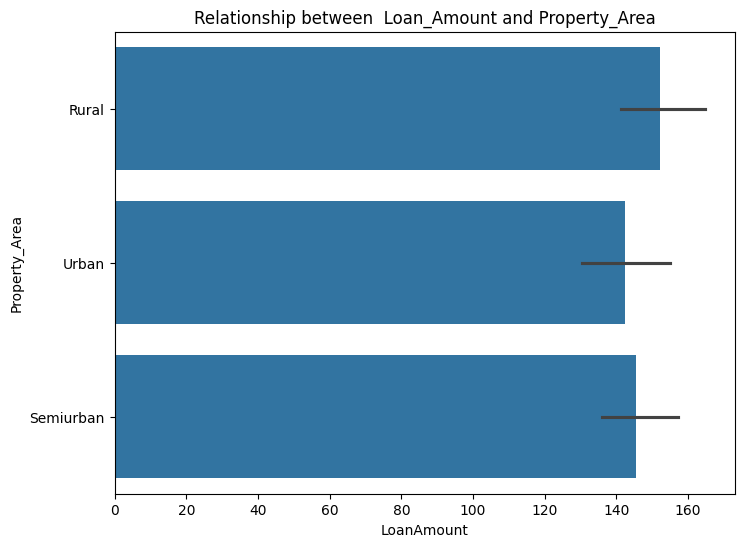

In [ ]:
# x=loanamount ,y=property area
plt.figure(figsize=(8,6))
sns.barplot(x='Loan Amount', y='Property Area', data=df)
plt.xlabel('LoanAmount')
plt.ylabel('Property_Area')
plt.title('Relationship between  Loan_Amount and Property_Area')
plt.show()

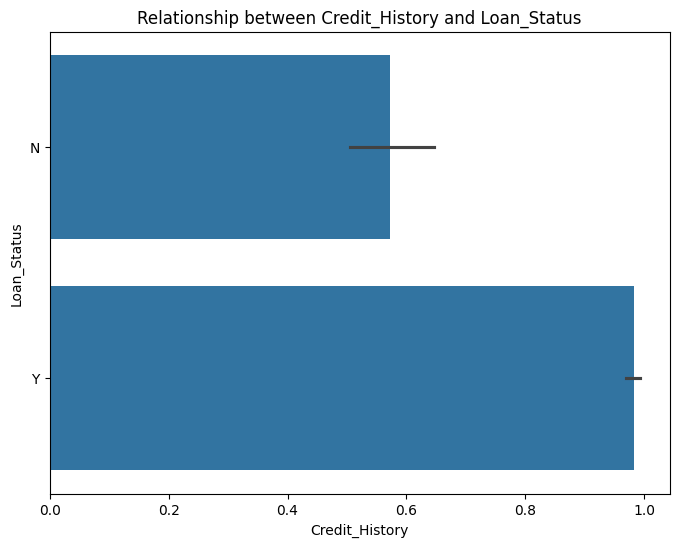

In [ ]:
# x=credit history ,y= loan status
plt.figure(figsize=(8,6))
sns.barplot(x='Credit History', y='Loan Status', data=df)
plt.xlabel('Credit_History')
plt.ylabel('Loan_Status')
plt.title('Relationship between Credit_History and Loan_Status')
plt.show()

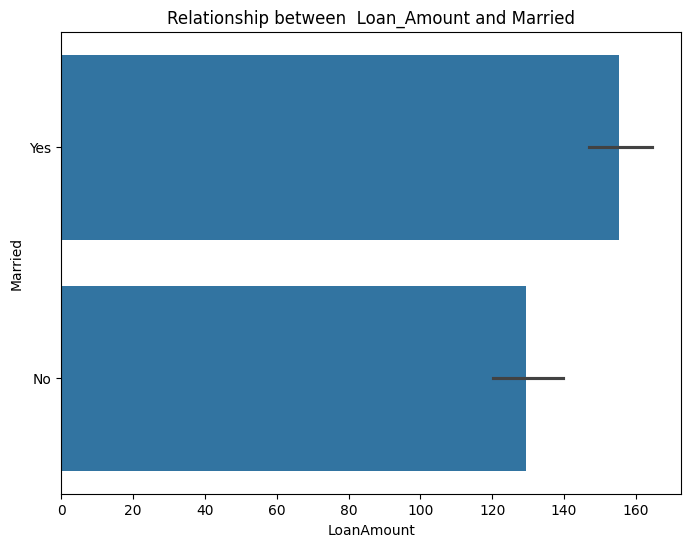

In [ ]:
# x=loan amount ,y =married
plt.figure(figsize=(8,6))
sns.barplot(x='Loan Amount', y='Married', data=df)
plt.xlabel('LoanAmount')
plt.ylabel('Married')
plt.title('Relationship between  Loan_Amount and Married')
plt.show()

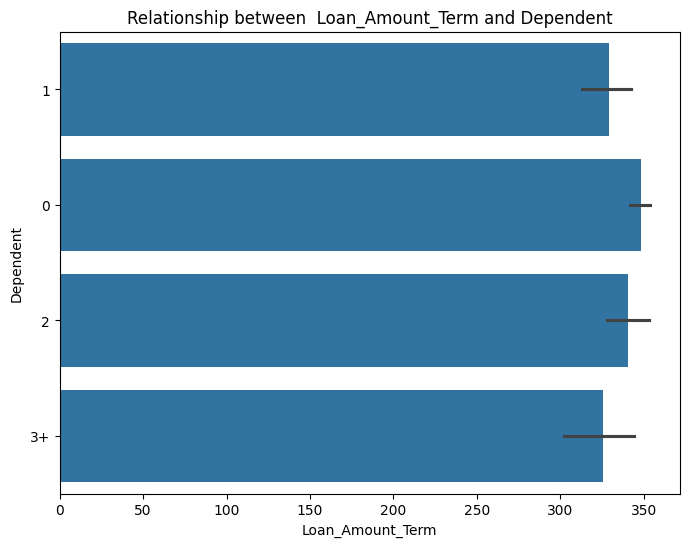

In [ ]:
# x=loan amount term , y = dependent
plt.figure(figsize=(8,6))
sns.barplot(x='Loan Amount Term', y='Dependent', data=df)
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Dependent')
plt.title('Relationship between  Loan_Amount_Term and Dependent')
plt.show()


# **Checking for outliers**

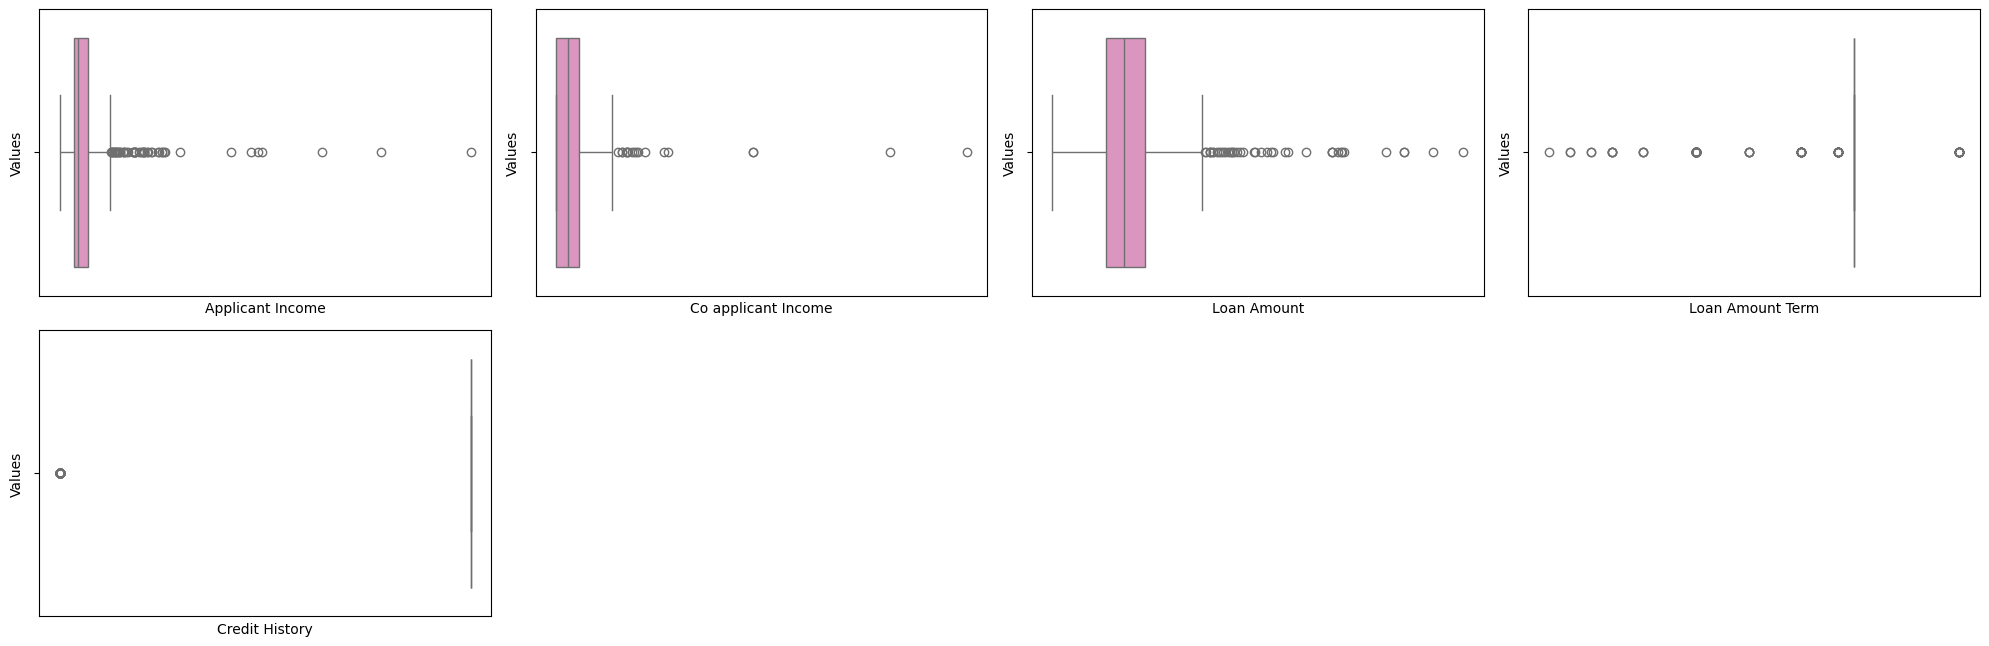

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df' is your DataFrame
numerical_col = df.select_dtypes(include=['number']).columns.tolist()
num_numerical_cols = len(numerical_col)

# Define subplot grid
num_rows = 5
num_cols = 4
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor='white')

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)

        # Customize subplot labels and ticks
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel("Values", fontsize=10)
        ax.set_xticks([])
        ax.tick_params(axis='y', labelsize=10)

        plotnumber += 1

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()


<Axes: >

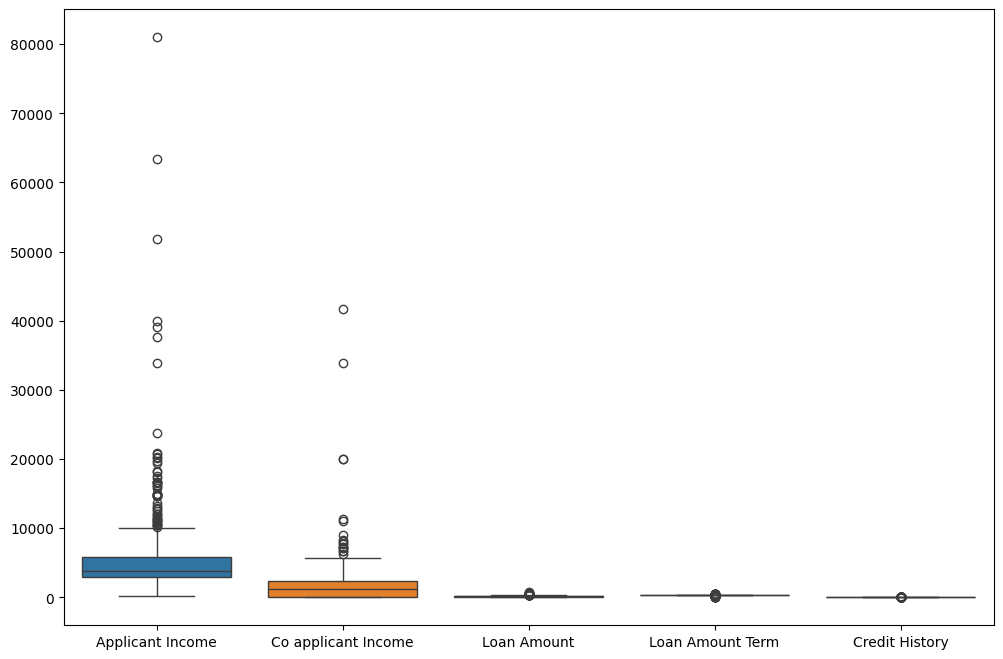

In [ ]:
## Checking the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [ ]:
import pandas as pd
#assuming df is your dataframe containing the relevrnt colums
#calculate IQR
columns_of_interest = ['Applicant Income', 'Co applicant Income', 'Loan Amount', 'Loan Amount Term','Credit History']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1
#determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)
#count the number of outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]
#print cleaned dataframe
print('dataframe after removing outliers:')
print(df1)
#optional print removed outliers
print('removed outliers:')
print(df[outliers])
num_outliers = outliers.sum()




dataframe after removing outliers:
     Gender Married Dependent      Graduate Self Employed  Applicant Income  \
0      Male     Yes         1      Graduate            No              4583   
1      Male     Yes         0      Graduate           Yes              3000   
2      Male     Yes         0  Not Graduate            No              2583   
3      Male      No         0      Graduate            No              6000   
5      Male     Yes         0  Not Graduate            No              2333   
..      ...     ...       ...           ...           ...               ...   
606    Male     Yes         2  Not Graduate            No              3987   
607    Male     Yes         0      Graduate            No              3232   
608  Female      No         0      Graduate            No              2900   
610    Male     Yes         1      Graduate            No              8072   
611    Male     Yes         2      Graduate            No              7583   

     Co applican

# here we can see that 227rows **deleted**

In [ ]:
df1.dtypes

,0
Gender,object
Married,object
Dependent,object
Graduate,object
Self Employed,object
Applicant Income,int64
Co applicant Income,float64
Loan Amount,float64
Loan Amount Term,float64
Credit History,float64


# **Label** **Encoder**

In [ ]:
#encoding = conversion of categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
#create a label encoder object
label_encoder= LabelEncoder()
#dictionary to store mappings
mappings = {}
# Define the list of categorical columns
categorical_col = ['Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed', 'Property Area','Loan Status'] # Replace with your actual categorical column names

#apply label encoder to each categorical column and store the mappings
for col in categorical_col:
    df1[col] = (df1[col]).astype(str)
    df1[col] = label_encoder.fit_transform(df1[col])
    mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("encoded dataframe : \n",df1.head())
    print("\n Mappings for each column:")
    for col, mapping in mappings.items():
        print(f"{col} mappings:", mapping)

encoded dataframe : 
    Gender Married Dependent      Graduate Self Employed  Applicant Income  \
0       1     Yes         1      Graduate            No              4583   
1       1     Yes         0      Graduate           Yes              3000   
2       1     Yes         0  Not Graduate            No              2583   
3       1      No         0      Graduate            No              6000   
5       1     Yes         0  Not Graduate            No              2333   

   Co applicant Income  Loan Amount  Loan Amount Term  Credit History  \
0               1508.0        128.0             360.0             1.0   
1                  0.0         66.0             360.0             1.0   
2               2358.0        120.0             360.0             1.0   
3                  0.0        141.0             360.0             1.0   
5               1516.0         95.0             360.0             1.0   

  Property Area Loan Status  
0         Rural           N  
1         Urban 

# checking how the data  is distributed

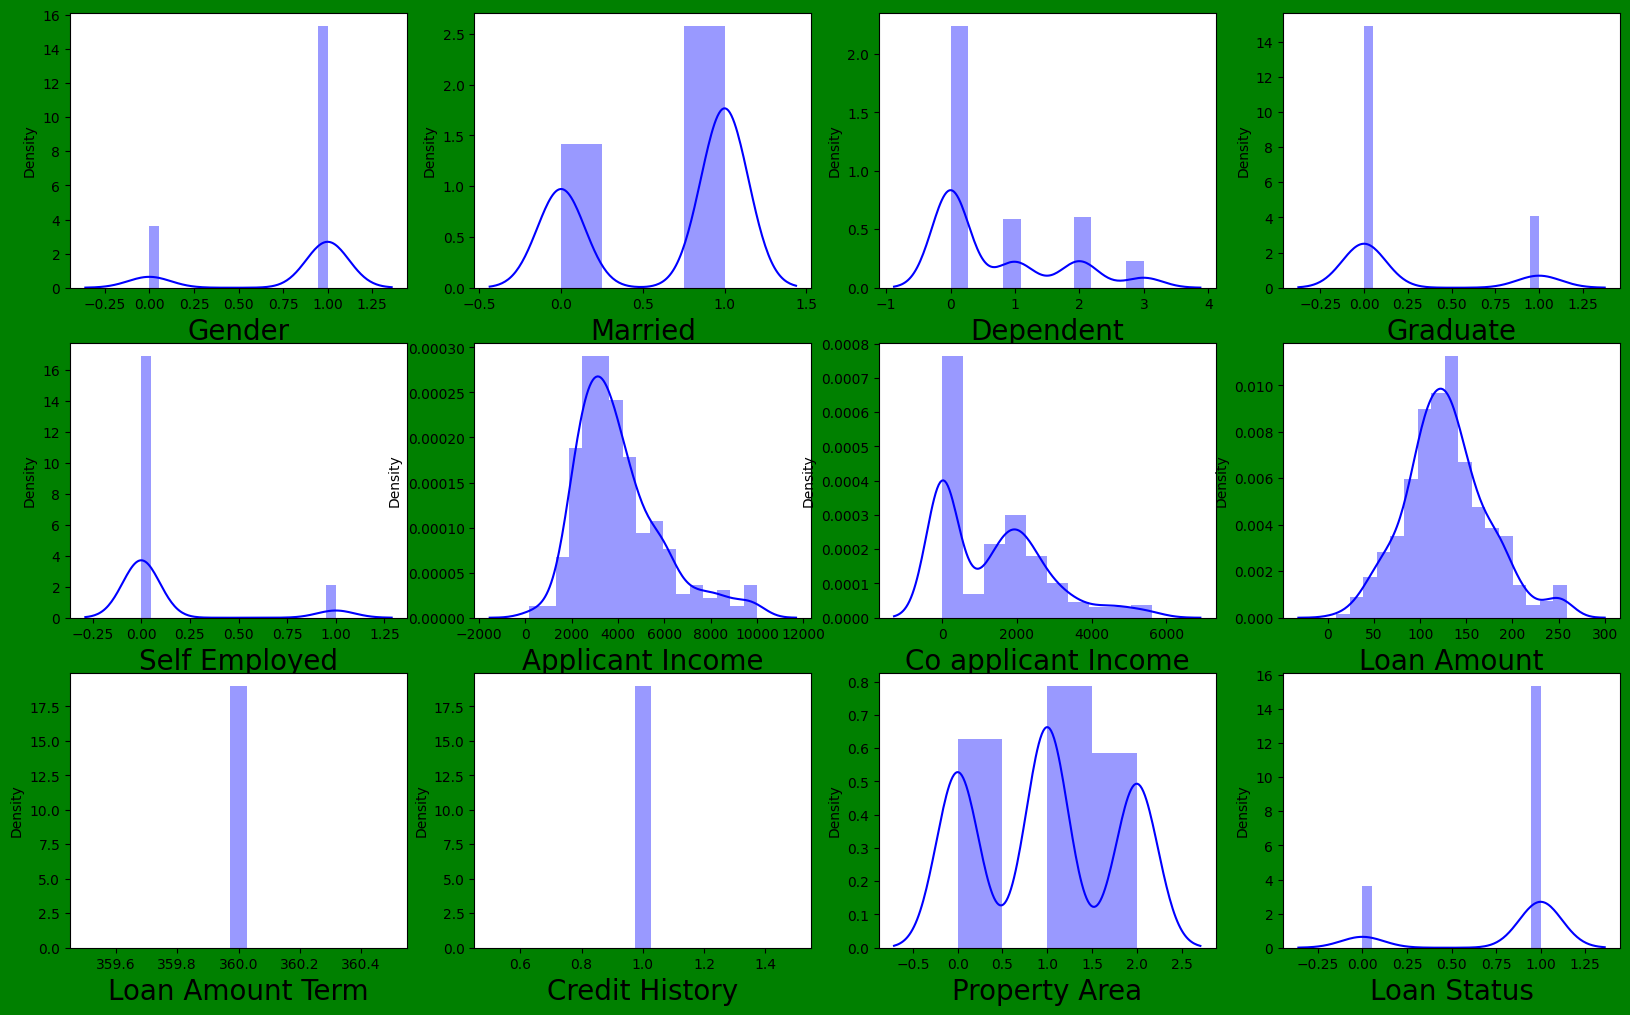

In [ ]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1

# Exclude the 'ID' column from plotting
numerical_columns = [col for col in df1.columns if col != 'ID' and df1[col].dtype != 'object']

for column in numerical_columns:  # Iterate through numerical columns only
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color = 'b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

plt.show()

# check skewness

In [ ]:
#now all data are converted into numerical form so no we check skewness
df1.skew()

,0
Gender,-1.572449
Married,-0.608767
Dependent,1.103436
Graduate,1.392692
Self Employed,2.479892
Applicant Income,1.122113
Co applicant Income,0.843290
Loan Amount,0.408599
Loan Amount Term,0.000000
Credit History,0.000000


<Axes: >

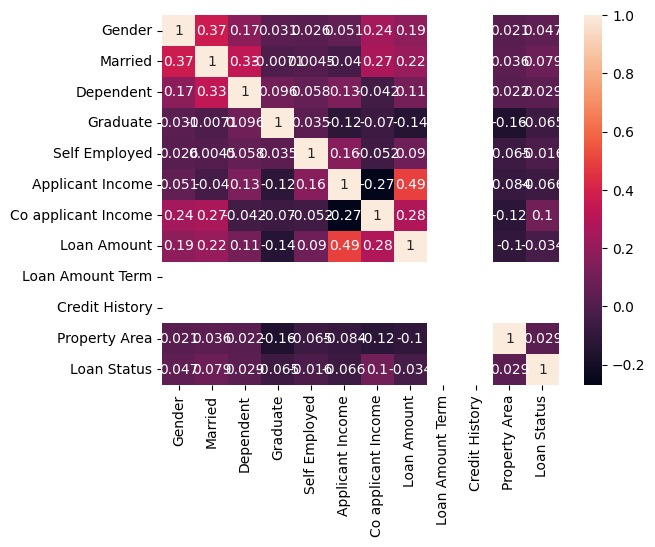

In [ ]:
sns.heatmap(df1.corr(), annot=True)

here we can see that all skewness is looks like perfect

Split the target features

In [ ]:
#separating the independent and target variable into x and y
x=df1.drop(['Loan Status'],axis=1)
y=df1['Loan Status']
print("feature dimentions=",x.shape)
print(" label  dimentions=",y.shape)


feature dimentions= (386, 11)
 label  dimentions= (386,)


In [ ]:
y.value_counts()

,count
Loan Status,
1,312
0,74


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=4)
x1, y1 = smote.fit_resample(x, y)
y1.value_counts()

,count
Loan Status,
0,312
1,312


# now y value is same

# Classification algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
#finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,50):
  x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
  RFR=RandomForestClassifier()
  RFR.fit(x_train,y_train)
  #making prediction on the test set
  predrf=RFR.predict(x_test)
  acc=accuracy_score(y_test,predrf)
  if acc>maxAccu:
    maxAccu=acc
    maxRS=i
print("best accuracy is",maxAccu,"on Random state",maxRS)

best accuracy is 0.8404255319148937 on Random state 12


here we can see that almost 85% accuracy from where random state is 40

creating train test split

In [ ]:
#split data into training and testing sets
x_train, x_test, y_train,y_test = train_test_split(x1,y1,test_size=.30,random_state=maxRS)

Random Forest Classifier

In [ ]:
#instantiate and train RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#making prediction on the test set
predrf=rf.predict(x_test)
#calculate accuracy
acc=accuracy_score(y_test, predrf)
print("accuracy is",acc)
#generate confusion matrix
conf_matrix=confusion_matrix(y_test,predrf)
print("confusion matrix is",conf_matrix)
#generate classification report
report=classification_report(y_test,predrf)
print("classification report is",report)


accuracy is 0.8191489361702128
confusion matrix is [[86 11]
 [23 68]]
classification report is               precision    recall  f1-score   support

           0       0.79      0.89      0.83        97
           1       0.86      0.75      0.80        91

    accuracy                           0.82       188
   macro avg       0.82      0.82      0.82       188
weighted avg       0.82      0.82      0.82       188



# Support Vector Machine Classifier

In [ ]:
#checking accuracy for support vector machine classifier
svc = SVC()
svc.fit(x_train, y_train)
#making prediction on the test set
predsvc=svc.predict(x_test)
#calculate accuracy
acc=accuracy_score(y_test, predsvc)
print("accuracy is",acc)

#generate confusion matrix
conf_matrix=confusion_matrix(y_test,predsvc)
print("confusion matrix is",conf_matrix)
#generate classification report
report=classification_report(y_test,predsvc)
print("classification report is",report)

accuracy is 0.5531914893617021
confusion matrix is [[55 42]
 [42 49]]
classification report is               precision    recall  f1-score   support

           0       0.57      0.57      0.57        97
           1       0.54      0.54      0.54        91

    accuracy                           0.55       188
   macro avg       0.55      0.55      0.55       188
weighted avg       0.55      0.55      0.55       188



# Gradient Boosting Classifier

In [ ]:
#checking accuracy for Gradientboostingclassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
#making prediction on the test set
predgbc=gbc.predict(x_test)
#calculate accuracy
acc=accuracy_score(y_test, predgbc)
print("accuracy is",acc)

#generate confusion matrix
conf_matrix=confusion_matrix(y_test,predgbc)
print("confusion matrix is",conf_matrix)
#generate classification report
report=classification_report(y_test,predgbc)
print("classification report is",report)


accuracy is 0.7872340425531915
confusion matrix is [[84 13]
 [27 64]]
classification report is               precision    recall  f1-score   support

           0       0.76      0.87      0.81        97
           1       0.83      0.70      0.76        91

    accuracy                           0.79       188
   macro avg       0.79      0.78      0.78       188
weighted avg       0.79      0.79      0.79       188



ada boost classifier


In [ ]:
#checking accuracy for adaboostclassifier
ab=AdaBoostClassifier()
ab.fit(x_train, y_train)
#making prediction on the test set
predab=ab.predict(x_test)
#calculate accuracy
acc=accuracy_score(y_test, predab)
print("accuracy is",acc)

#generate confusion matrix
conf_matrix=confusion_matrix(y_test,predab)
print("confusion matrix is",conf_matrix)
#generate classification report
report=classification_report(y_test,predab)
print("classification report is",report)


accuracy is 0.7287234042553191
confusion matrix is [[72 25]
 [26 65]]
classification report is               precision    recall  f1-score   support

           0       0.73      0.74      0.74        97
           1       0.72      0.71      0.72        91

    accuracy                           0.73       188
   macro avg       0.73      0.73      0.73       188
weighted avg       0.73      0.73      0.73       188



extra trees classifier


In [ ]:
#checking accuracy for the Extatreesclassfier
etc=ExtraTreesClassifier()
etc.fit(x_train, y_train)
predet = etc.predict(x_test)
#calculate accuracy
acc=accuracy_score(y_test, predet)
print("accuracy is",acc)
#generate confusion matrix
conf_matrix=confusion_matrix(y_test,predet)
print("confusion matrix is",conf_matrix)
#generate classification report
report=classification_report(y_test,predet)
print("classification report is",report)

accuracy is 0.8085106382978723
confusion matrix is [[84 13]
 [23 68]]
classification report is               precision    recall  f1-score   support

           0       0.79      0.87      0.82        97
           1       0.84      0.75      0.79        91

    accuracy                           0.81       188
   macro avg       0.81      0.81      0.81       188
weighted avg       0.81      0.81      0.81       188



after checking each algorithm ,it was found that random forest classifier is the best algo



now we find best hyper parameter

# Hyper parameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#define the model
rf = RandomForestClassifier()
#define the parameter grid
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
#create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#fit the model
grid_search.fit(x_train, y_train) # This line was moved before accessing best_params_ and best_estimator_
#print the best parameters
best_params=grid_search.best_params_ # This line was moved after fitting the model
print("Best parameters: ",best_params)
#print the best score
best_model= grid_search.best_estimator_ # This line was moved after fitting the model
print("Best model: ", best_model)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best model:  RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=200)


In [ ]:
import pickle
#define the model
model=RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='log2',max_depth=None,bootstrap=False)
#train the model
model.fit(x_train,y_train)
#save the model to disk
with open("Loan_application_status.pkl",'wb') as file:
  pickle.dump(model,file)


In [ ]:
#open the model
with open("Loan_application_status.pkl",'rb') as file:
  load_model=pickle.load(file)
  #ensure that the model is fitted before calling score
  if hasattr(load_model, "fit"):
    #evaluate the model on test data
    result = load_model.score(x_test,y_test)
    print(result *100)
  else:
      print("Model is not fitted.")

86.17021276595744


# make the diagram to pridict loan status

In [ ]:
import joblib
#define the mapping dictionaries
Gender_mapping = {'Female': 0, 'Male': 1}
Married_mapping = {'No': 0, 'Yes': 1}
Dependents_mapping = {0: 0, 1: 1, 2: 2, 3: 3}
Graduate_mapping = {' Not Graduate': 0, 'Graduate': 1}
Self_Employed_mapping = {'No': 0, 'Yes': 1}
Property_Area_mapping = {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
Loan_Status_mapping = {'Rejected': 0, 'Approved': 1}
#define the input data (characteristics)
input_data = ["Male",	"No"	,0,	"Graduate",	"No",	6000,	0.0	,141.0	,360.0,	1.0,	"Urban"]
#map the input data
input_data_numerical = [
    Gender_mapping[input_data[0]],
    Married_mapping[input_data[1]],
    Dependents_mapping[int(input_data[2])],
    Graduate_mapping[input_data[3]],
    Self_Employed_mapping[input_data[4]],
    input_data[5],
    input_data[6],
    input_data[7],
    input_data[8],
    input_data[9],
    Property_Area_mapping[input_data[10]]
]
#load your trained model
model=joblib.load("Loan_application_status.pkl")
#make the prediction using the trained model
prediction = model.predict([input_data_numerical])
#print the input data and pridicted Loan Status
print("Input Data:", input_data_numerical)
print("Predicted Loan Status:", prediction)


Input Data: [1, 0, 0, 1, 0, 6000, 0.0, 141.0, 360.0, 1.0, 2]
Predicted Loan Status: [1]


In [ ]:
if prediction[0] == 0:
    print("Loan Status: Rejected")
else:
    print("Loan Status: Approved")

Loan Status: Approved


# thank you